In [1]:
import pandas as pd
import numpy as np
from os import path
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn import metrics
from config import *
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv(path.join(DATA_DIR, TRAIN_PROC_FILE))
test_df = pd.read_csv(path.join(DATA_DIR, TEST_PROC_FILE))


op_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
op_df['PassengerId'] = test_df['PassengerId']

In [3]:
y = train_df['Survived']
X = train_df.drop(columns=['Survived'])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35, random_state=20)

----
#### Decision Tree

Validation: Cross validated scores, Cross Predicted Accuracy

Score: Accuracy

Feature importance plot



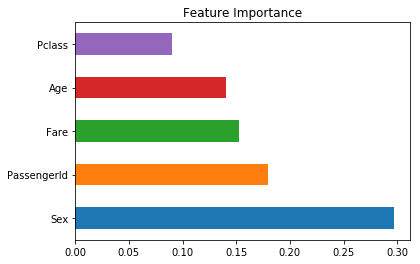

Cross validated scores: [0.77777778 0.72649573 0.74782609 0.73043478 0.76521739]
Cross Predicted Accuracy: -0.2807768704480247
Confusion Matrix: 
 [[153  44]
 [ 49  66]]


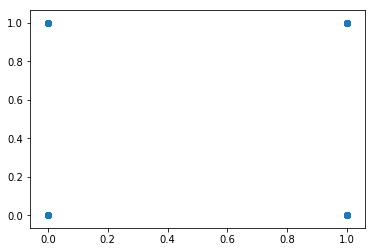

In [4]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

print("Feature importance plot\n")
feat_importances = pd.Series(dec_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

scores = cross_val_score(dec_tree, X_train, y_train, cv=5)
print("Cross validated scores:", scores)

pred = cross_val_predict(dec_tree, X_val, y_val, cv=5)

accuracy = metrics.r2_score(y_val, pred)
print("Cross Predicted Accuracy:", accuracy)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_val, pred, labels=[0, 1]))
plt.scatter(y_val, pred)

In [5]:
op_df['Survived'] = dec_tree.predict(test_df).astype(int)

op_df.to_csv(path.join(DATA_DIR, DEC_TREE_PRED_FILE), index=None)

### Accuracy: 67.942%

----
#### Extra Tree Classifier

Validation: Cross validated scores, Cross Predicted Accuracy

Score: Accuracy

Feature importance plot



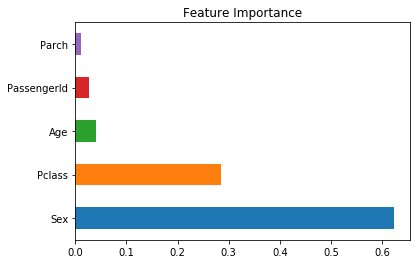

Cross validated scores: [0.75213675 0.8034188  0.82608696 0.8        0.8       ]
Cross Predicted Accuracy: 0.11860516442286473
Confusion Matrix: 
 [[177  20]
 [ 44  71]]


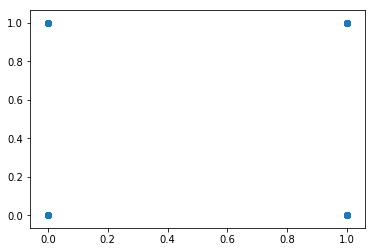

In [6]:
extra_tree = ExtraTreeClassifier(max_depth=4, max_features=5)
extra_tree.fit(X_train, y_train)

print("Feature importance plot\n")
feat_importances = pd.Series(extra_tree.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

scores = cross_val_score(extra_tree, X_train, y_train, cv=5)
print("Cross validated scores:", scores)

pred = cross_val_predict(extra_tree, X_val, y_val, cv=5)

accuracy = metrics.r2_score(y_val, pred)
print("Cross Predicted Accuracy:", accuracy)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_val, pred, labels=[0, 1]))
plt.scatter(y_val, pred)

In [7]:
op_df['Survived'] = extra_tree.predict(test_df).astype(int)

op_df.to_csv(path.join(DATA_DIR, EXTRA_TREE_PRED_FILE), index=None)

### Accuracy: 77.511%

----
#### Random Forest Classifier

Validation: Cross validated scores, Cross Predicted Accuracy

Score: Accuracy

Feature importance plot



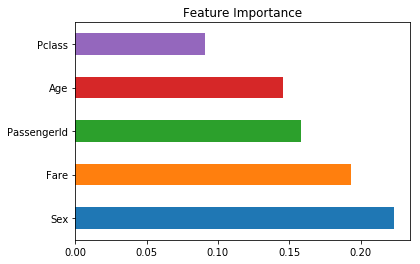

Cross validated scores: [0.81196581 0.84615385 0.83478261 0.84347826 0.8       ]
Cross Predicted Accuracy: 0.04974619289340099
Confusion Matrix: 
 [[168  29]
 [ 40  75]]


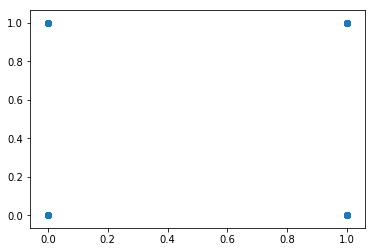

In [9]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

print("Feature importance plot\n")
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

scores = cross_val_score(rfc, X_train, y_train, cv=5)
print("Cross validated scores:", scores)

pred = cross_val_predict(rfc, X_val, y_val, cv=5)

accuracy = metrics.r2_score(y_val, pred)
print("Cross Predicted Accuracy:", accuracy)

print("Confusion Matrix: \n", metrics.confusion_matrix(y_val, pred, labels=[0, 1]))
plt.scatter(y_val, pred)

In [10]:
op_df['Survived'] = rfc.predict(test_df).astype(int)

op_df.to_csv(path.join(DATA_DIR, RF_PRED_FILE), index=None)

### Accuracy: 75.598%